In [1]:
# Import all required libraries 

import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("F:/Pranjali/FLIP ROBO_Internship/Assignment_Worksheet/Assignment_Feb2021/OTA-Project/OTA Project/train_small.csv")

# Load & Read Data file using Pandas

In [3]:
df.head(1)

search_id            timestamp  site_id  user_country_id  user_hist_stars  \
0          4  2012-12-31 08:59:22        5              219              NaN   

   user_hist_paid  listing_country_id  listing_id  listing_stars  \
0             NaN                 219        3625              4   

   listing_review_score  ...  competitor6_price_percent_diff  \
0                   4.0  ...                             NaN   

   competitor7_rate  competitor7_has_availability  \
0               NaN                           NaN   

   competitor7_price_percent_diff  competitor8_rate  \
0                             NaN               NaN   

   competitor8_has_availability  competitor8_price_percent_diff  clicked  \
0                           NaN                             NaN        0   

   booking_value  booked  
0            NaN       0  

[1 rows x 54 columns]

In [4]:
# Checking for null values & data types of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380557 entries, 0 to 2380556
Data columns (total 54 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   search_id                       int64  
 1   timestamp                       object 
 2   site_id                         int64  
 3   user_country_id                 int64  
 4   user_hist_stars                 float64
 5   user_hist_paid                  float64
 6   listing_country_id              int64  
 7   listing_id                      int64  
 8   listing_stars                   int64  
 9   listing_review_score            float64
 10  is_brand                        int64  
 11  location_score1                 float64
 12  location_score2                 float64
 13  log_historical_price            float64
 14  listing_position                int64  
 15  price_usd                       float64
 16  has_promotion                   int64  
 17  destination_id             

In [5]:
# Check null values
df.isnull().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
user_hist_stars                   2257777
user_hist_paid                    2257063
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                 3486
is_brand                                0
location_score1                         0
location_score2                    525992
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                  

# Deal with null values

In [6]:
# Replace null with 0 -- user_hist_stars,etc..,

import numpy as np
df['user_hist_stars'] = df['user_hist_stars'].replace(np.nan, 0)
df['user_hist_paid'] = df['user_hist_paid'].replace(np.nan, 0)
df['listing_review_score'] = df['listing_review_score'].replace(np.nan, 0)
df['location_score2'] = df['location_score2'].replace(np.nan, 0)
df['log_click_proportion'] = df['log_click_proportion'].replace(np.nan, 0)
df['distance_to_dest'] = df['distance_to_dest'].replace(np.nan, 0)

In [7]:
# filling NA values ; mode() applicable only for categorical data ; here [0] index for mode
df["competitor1_rate"].fillna(df["competitor1_rate"].mode()[0],inplace=True)
df["competitor1_has_availability"].fillna(df["competitor1_has_availability"].mode()[0],inplace=True)

df["competitor2_rate"].fillna(df["competitor2_rate"].mode()[0],inplace=True)
df["competitor2_has_availability"].fillna(df["competitor2_has_availability"].mode()[0],inplace=True)

df["competitor3_rate"].fillna(df["competitor3_rate"].mode()[0],inplace=True)
df["competitor3_has_availability"].fillna(df["competitor3_has_availability"].mode()[0],inplace=True)

df["competitor4_rate"].fillna(df["competitor4_rate"].mode()[0],inplace=True)
df["competitor4_has_availability"].fillna(df["competitor4_has_availability"].mode()[0],inplace=True)

df["competitor5_rate"].fillna(df["competitor5_rate"].mode()[0],inplace=True)
df["competitor5_has_availability"].fillna(df["competitor5_has_availability"].mode()[0],inplace=True)

df["competitor6_rate"].fillna(df["competitor6_rate"].mode()[0],inplace=True)
df["competitor6_has_availability"].fillna(df["competitor6_has_availability"].mode()[0],inplace=True)

df["competitor7_rate"].fillna(df["competitor7_rate"].mode()[0],inplace=True)
df["competitor7_has_availability"].fillna(df["competitor7_has_availability"].mode()[0],inplace=True)

df["competitor8_rate"].fillna(df["competitor8_rate"].mode()[0],inplace=True)
df["competitor8_has_availability"].fillna(df["competitor8_has_availability"].mode()[0],inplace=True)


In [8]:
#This data is categorical but null denotes no price % hence assigning 0 for null.
import numpy as np
df['competitor1_price_percent_diff'] = df['competitor1_price_percent_diff'].replace(np.nan, 0)
df['competitor2_price_percent_diff'] = df['competitor2_price_percent_diff'].replace(np.nan, 0)
df['competitor3_price_percent_diff'] = df['competitor3_price_percent_diff'].replace(np.nan, 0)
df['competitor4_price_percent_diff'] = df['competitor4_price_percent_diff'].replace(np.nan, 0)
df['competitor5_price_percent_diff'] = df['competitor5_price_percent_diff'].replace(np.nan, 0)
df['competitor6_price_percent_diff'] = df['competitor6_price_percent_diff'].replace(np.nan, 0)
df['competitor7_price_percent_diff'] = df['competitor7_price_percent_diff'].replace(np.nan, 0)
df['competitor8_price_percent_diff'] = df['competitor8_price_percent_diff'].replace(np.nan, 0)

In [9]:
# filling NA values
df["booking_value"].fillna(df["booking_value"].mean(),inplace=True)

In [10]:
# Checking for skewness
df.skew()

search_id                           -0.004562
site_id                              1.453279
user_country_id                     -1.049364
user_hist_stars                      4.331498
user_hist_paid                       7.684528
listing_country_id                  -1.067757
listing_id                           0.012977
listing_stars                       -0.666650
listing_review_score                -2.232478
is_brand                            -0.559432
location_score1                      0.132128
location_score2                      2.235721
log_historical_price                -1.726552
listing_position                     0.179594
price_usd                          453.804919
has_promotion                        1.388013
destination_id                       0.079124
length_of_stay                       3.484501
booking_window                       2.399389
num_adults                           2.328857
num_kids                             2.465520
num_rooms                         

In [11]:
# Check null values again after replacing nan
df.isnull().sum()

# to check missing values
# sns.heatmap(df.isnull())

search_id                         0
timestamp                         0
site_id                           0
user_country_id                   0
user_hist_stars                   0
user_hist_paid                    0
listing_country_id                0
listing_id                        0
listing_stars                     0
listing_review_score              0
is_brand                          0
location_score1                   0
location_score2                   0
log_historical_price              0
listing_position                  0
price_usd                         0
has_promotion                     0
destination_id                    0
length_of_stay                    0
booking_window                    0
num_adults                        0
num_kids                          0
num_rooms                         0
stay_on_saturday                  0
log_click_proportion              0
distance_to_dest                  0
random_sort                       0
competitor1_rate            

In [15]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df)

capping the  search_id
capping the  timestamp
capping the  site_id
capping the  user_country_id
capping the  user_hist_stars
capping the  user_hist_paid
capping the  listing_country_id
capping the  listing_id
capping the  listing_stars
capping the  listing_review_score
capping the  is_brand
capping the  location_score1
capping the  location_score2
capping the  log_historical_price
capping the  listing_position
capping the  price_usd
capping the  has_promotion
capping the  destination_id
capping the  length_of_stay
capping the  booking_window
capping the  num_adults
capping the  num_kids
capping the  num_rooms
capping the  stay_on_saturday
capping the  log_click_proportion
capping the  distance_to_dest
capping the  random_sort
capping the  competitor1_rate
capping the  competitor1_has_availability
capping the  competitor1_price_percent_diff
capping the  competitor2_rate
capping the  competitor2_has_availability
capping the  competitor2_price_percent_diff
capping the  competitor3_rate
ca

In [16]:
# Checking for skewness
df.skew()

search_id                        -0.004500
site_id                           1.453434
user_country_id                  -1.042820
user_hist_stars                   4.262826
user_hist_paid                    4.798185
listing_country_id               -1.062690
listing_id                        0.012947
listing_stars                    -0.666650
listing_review_score             -2.232478
is_brand                         -0.559432
location_score1                   0.107639
location_score2                   2.053838
log_historical_price             -1.726552
listing_position                  0.171088
price_usd                         1.982761
has_promotion                     1.388013
destination_id                    0.079952
length_of_stay                    1.917634
booking_window                    2.097636
num_adults                        1.443410
num_kids                          2.025916
num_rooms                         3.575397
stay_on_saturday                  0.006935
log_click_p

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380557 entries, 0 to 2380556
Data columns (total 54 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   search_id                       int64  
 1   timestamp                       object 
 2   site_id                         int64  
 3   user_country_id                 int64  
 4   user_hist_stars                 float64
 5   user_hist_paid                  float64
 6   listing_country_id              int64  
 7   listing_id                      int64  
 8   listing_stars                   int64  
 9   listing_review_score            float64
 10  is_brand                        int64  
 11  location_score1                 float64
 12  location_score2                 float64
 13  log_historical_price            float64
 14  listing_position                int64  
 15  price_usd                       float64
 16  has_promotion                   int64  
 17  destination_id             

In [18]:
# The get_dummies() function is used to convert categorical variable into numerics
x["booked"]=pd.get_dummies(x["booked"],drop_first=True)
x.head()


NameError: name 'x' is not defined

# EDA - Analyse the data set stats using plots

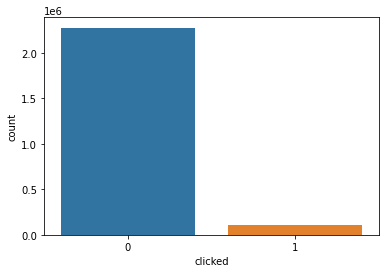

In [19]:
sns.countplot(x='clicked', data=df);

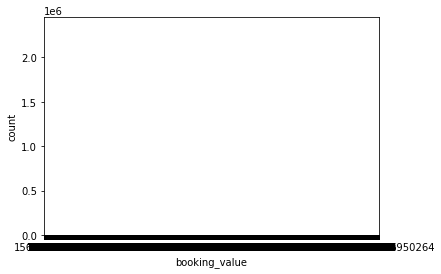

In [17]:
sns.countplot(x='booking_value', data=df);

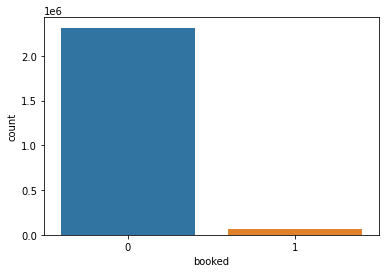

In [18]:
sns.countplot(x='booked', data=df);

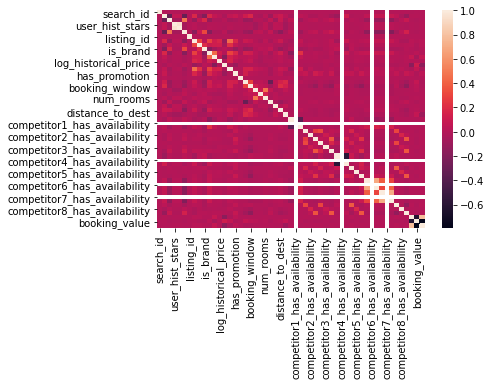

In [19]:
# checking correlation
dfcor=df.corr()
sns.heatmap(dfcor)

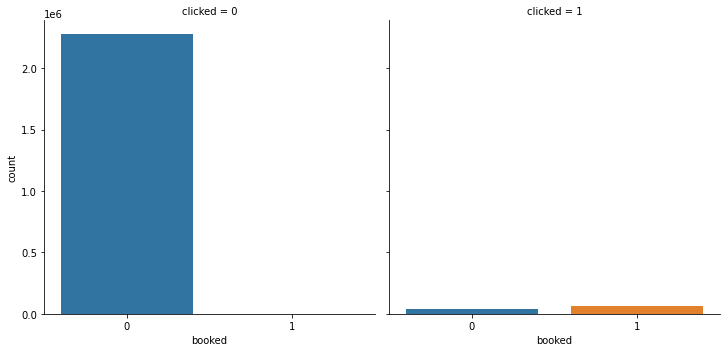

In [20]:
# build bar plots of Online Travel Agency dataset feature 'booked' splits over the feature 'clicked'
sns.factorplot(x='booked', col='clicked', kind='count', data=df);

In [21]:
df.describe()

search_id       site_id  user_country_id  user_hist_stars  \
count  2.380557e+06  2.380557e+06     2.380557e+06     2.380557e+06   
mean   3.337035e+05  9.981932e+00     1.755062e+02     1.714096e-01   
std    1.922612e+05  7.641638e+00     6.571452e+01     7.478121e-01   
min    6.688000e+03  5.000000e+00     1.600000e+01     0.000000e+00   
25%    1.674260e+05  5.000000e+00     1.000000e+02     0.000000e+00   
50%    3.332720e+05  5.000000e+00     2.190000e+02     0.000000e+00   
75%    5.007050e+05  1.400000e+01     2.190000e+02     0.000000e+00   
max    6.591650e+05  3.200000e+01     2.200000e+02     4.000000e+00   

       user_hist_paid  listing_country_id    listing_id  listing_stars  \
count    2.380557e+06        2.380557e+06  2.380557e+06   2.380557e+06   
mean     8.213688e+00        1.739408e+02  7.008172e+04   3.180607e+00   
std      3.752794e+01        6.817102e+01  4.058075e+04   1.052086e+00   
min      0.000000e+00        1.400000e+01  1.396000e+03   0.000000e+00   
25%      0.000000e+00        1.000000e+02  3.502800e+04   3.000000e+00   
50%      0.000000e+00        2.190000e+02  6.961500e+04   3.000000e+00   
75%      0.000000e+00        2.190000e+02  1.051420e+05   4.000000e+00   
max      2.375900e+02        2.200000e+02  1.393880e+05   5.000000e+00   

       listing_review_score      is_brand  ...  \
count          2.380557e+06  2.380557e+06  ...   
mean           3.773881e+00  6.346880e-01  ...   
std            1.058867e+00  4.815176e-01  ...   
min            0.000000e+00  0.000000e+00  ...   
25%            3.500000e+00  0.000000e+00  ...   
50%            4.000000e+00  1.000000e+00  ...   
75%            4.500000e+00  1.000000e+00  ...   
max            5.000000e+00  1.000000e+00  ...   

       competitor6_price_percent_diff  competitor7_rate  \
count                    2.380557e+06      2.380557e+06   
mean                     1.752653e-01      1.639364e-02   
std                      1.298851e+00      1.269838e-01   
min                      0.000000e+00      0.000000e+00   
25%                      0.000000e+00      0.000000e+00   
50%                      0.000000e+00      0.000000e+00   
75%                      0.000000e+00      0.000000e+00   
max                      1.100000e+01      1.000000e+00   

       competitor7_has_availability  competitor7_price_percent_diff  \
count                     2380557.0                    2.380557e+06   
mean                            0.0                    3.287315e-01   
std                             0.0                    2.109238e+00   
min                             0.0                    0.000000e+00   
25%                             0.0                    0.000000e+00   
50%                             0.0                    0.000000e+00   
75%                             0.0                    0.000000e+00   
max                             0.0                    1.700000e+01   

       competitor8_rate  competitor8_has_availability  \
count      2.380557e+06                  2.380557e+06   
mean      -2.302780e-02                  1.019929e-02   
std        2.922695e-01                  1.004752e-01   
min       -1.000000e+00                  0.000000e+00   
25%        0.000000e+00                  0.000000e+00   
50%        0.000000e+00                  0.000000e+00   
75%        0.000000e+00                  0.000000e+00   
max        1.000000e+00                  1.000000e+00   

       competitor8_price_percent_diff       clicked  booking_value  \
count                    2.380557e+06  2.380557e+06   2.380557e+06   
mean                     1.602132e+00  4.456688e-02   3.796349e+02   
std                      5.113662e+00  2.063509e-01   2.681744e+01   
min                      0.000000e+00  0.000000e+00   1.567681e+02   
25%                      0.000000e+00  0.000000e+00   3.832291e+02   
50%                      0.000000e+00  0.000000e+00   3.832291e+02   
75%                      0.000000e+00  0.000000e+00   3.832291e+02   
max   

There is difference between 75% quartile & max values for most of the columns.                                                                   
Few columns having major difference between mean & 50% quartile.                                                                                        
Above 2 observation shows that outliers exist in dataset to considerable extend.

In [22]:
# class distribution of target 
print(df.groupby('clicked').size())

clicked
0    2274463
1     106094
dtype: int64


In [23]:
# class distribution of target 
print(df.groupby('booked').size())

booked
0    2314169
1      66388
dtype: int64


# Prepare x & y - 

In [24]:
my_list = df.columns.values.tolist()
my_list

['search_id',
 'timestamp',
 'site_id',
 'user_country_id',
 'user_hist_stars',
 'user_hist_paid',
 'listing_country_id',
 'listing_id',
 'listing_stars',
 'listing_review_score',
 'is_brand',
 'location_score1',
 'location_score2',
 'log_historical_price',
 'listing_position',
 'price_usd',
 'has_promotion',
 'destination_id',
 'length_of_stay',
 'booking_window',
 'num_adults',
 'num_kids',
 'num_rooms',
 'stay_on_saturday',
 'log_click_proportion',
 'distance_to_dest',
 'random_sort',
 'competitor1_rate',
 'competitor1_has_availability',
 'competitor1_price_percent_diff',
 'competitor2_rate',
 'competitor2_has_availability',
 'competitor2_price_percent_diff',
 'competitor3_rate',
 'competitor3_has_availability',
 'competitor3_price_percent_diff',
 'competitor4_rate',
 'competitor4_has_availability',
 'competitor4_price_percent_diff',
 'competitor5_rate',
 'competitor5_has_availability',
 'competitor5_price_percent_diff',
 'competitor6_rate',
 'competitor6_has_availability',
 'compet

In [25]:
import pandas as pd

#Preparing x by removing timestamp column as it does not impacting anything & y 

X = df[['search_id',
 'site_id',
 'user_country_id',
 'user_hist_stars',
 'user_hist_paid',
 'listing_country_id',
 'listing_id',
 'listing_stars',
 'listing_review_score',
 'is_brand',
 'location_score1',
 'location_score2',
 'log_historical_price',
 'listing_position',
 'price_usd',
 'has_promotion',
 'destination_id',
 'length_of_stay',
 'booking_window',
 'num_adults',
 'num_kids',
 'num_rooms',
 'stay_on_saturday',
 'log_click_proportion',
 'distance_to_dest',
 'random_sort',
 'competitor1_rate',
 'competitor1_has_availability',
 'competitor1_price_percent_diff',
 'competitor2_rate',
 'competitor2_has_availability',
 'competitor2_price_percent_diff',
 'competitor3_rate',
 'competitor3_has_availability',
 'competitor3_price_percent_diff',
 'competitor4_rate',
 'competitor4_has_availability',
 'competitor4_price_percent_diff',
 'competitor5_rate',
 'competitor5_has_availability',
 'competitor5_price_percent_diff',
 'competitor6_rate',
 'competitor6_has_availability',
 'competitor6_price_percent_diff',
 'competitor7_rate',
 'competitor7_has_availability',
 'competitor7_price_percent_diff',
 'competitor8_rate',
 'competitor8_has_availability',
 'competitor8_price_percent_diff',
 'clicked',
 'booking_value']]
y = df.booked        # y is a vector, hence we use dot to access 'label'

In [26]:
print(X.shape)

(2380557, 52)


In [27]:
print(y.shape)

(2380557,)


In [28]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()        # instantiate model
logreg.fit(X_train, y_train)         # fit model

LogisticRegression()

In [30]:
# make class predictions for the testing set
from sklearn import metrics

y_pred_class = logreg.predict(X_test)

# Classification accuracy: percentage of correct predictions
print(metrics.accuracy_score(y_test, y_pred_class))

0.9844003091709513


In [31]:
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# From sklearn matrics import accuracy_score,confusion_matrix,classification_reports
# Cross validation Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [32]:
# Decision Tree Classifier (criterion='gini')
# Decision Tree Classifier (criterion='entropy')
# gini and entropy

dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,X,y,cv=5,scoring='f1_macro')

print('f1_score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(dtc, X, y, cv=5)

print('Y prediction values')
print(y_pred)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

f1_score: [0.93987046 0.95880383 0.9602014  0.95913042 0.94937205]
mean score: 0.9534756325610487
stn deviation: 0.007842732253653423
Y prediction values
[0 0 0 ... 0 0 0]


array([[2307708,    6461],
       [   5627,   60761]], dtype=int64)

Conclusion-Logistic Regression model best suits for this data set.